In [13]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [14]:
n = 30
mu = 100
sigma = 10
diff = 0.1

In [15]:
n_trials = 1000
significiant_count = 0

In [16]:
for i in range(n_trials):
  control_group = np.random.normal(mu, sigma, n)
  exp_group = np.random.normal(mu + mu * diff, sigma, n)
  test_fit = stats.ttest_ind(control_group, exp_group)
  if test_fit.pvalue < 0.05:
    significiant_count += 1

In [17]:
significiant_count / n_trials

0.969

In [81]:
days = 100

In [82]:
mu_control, sigma_control, n_control = 100, 20, 100
mu_experiment, sigma_experiment, n_experiment = 100, 20, 100

In [83]:
current_date = 1
user_data = pd.DataFrame()
stat_result = pd.DataFrame()
daily_data = pd.DataFrame()

In [84]:
for day in range(days):
    daily_data_control = np.random.normal(mu_control, sigma_control, n_control)
    daily_data_experiment = np.random.normal(mu_experiment, sigma_experiment, n_experiment)

    day_data_control = pd.DataFrame({'value': daily_data_control})
    day_data_control['date'] = current_date
    day_data_control['group'] = 'control'


    day_data_experiment = pd.DataFrame({'value': daily_data_experiment})
    day_data_experiment['date'] = current_date
    day_data_experiment['group'] = 'experiment'


    user_data = user_data.append(day_data_experiment).append(day_data_control)
    fit = stats.ttest_ind(user_data[user_data.group == 'experiment'].value,
                          user_data[user_data.group == 'control'].value)


    stat_result = stat_result.append(pd.DataFrame({'t': [fit[0]], 'p': [fit[1]], 'date': current_date}))


    current_data_stat = user_data.groupby(['group'], as_index=False).agg({'value': 'mean'})
    current_data_stat['date'] = current_date

    daily_data = daily_data.append(current_data_stat)

    current_date += 1


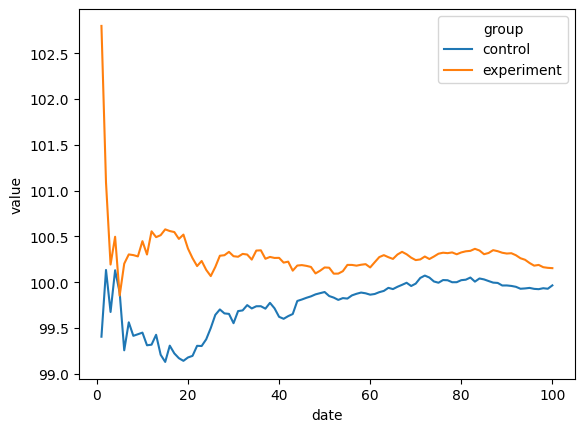

In [85]:
ax = sns.lineplot(data=daily_data, x='date', y='value', hue='group')

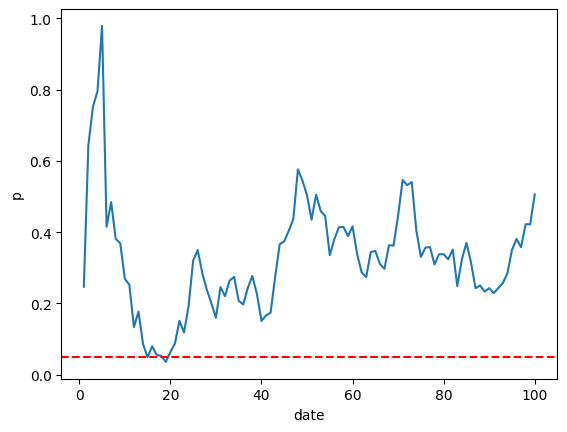

In [86]:
ax = sns.lineplot(data=stat_result, x="date", y="p")
ax.axhline(0.05, ls='--', color='red')